# SM_London - Exploratory Data Analysis

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import plotly.express as pex
import math
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

### Importing Data

In [94]:
#energy_df
energy_df = pd.read_csv('/Users/omarmartinez/Desktop/Machine Learning/ML_Projects/SM_London/dataset/Datasets after cleaning/energy_df.csv')

In [95]:
energy_df['uvIndex'].value_counts()

1.0    1428739
4.0     456138
2.0     422194
5.0     419481
6.0     329903
3.0     264361
0.0     100680
7.0      37178
Name: uvIndex, dtype: int64

In [4]:
# Converting uv_index to categorical 
energy_df['uvIndex'] = energy_df['uvIndex'].replace([0,1,2], 'Low').replace([3,4,5], 'Medium').replace([6,7], 'High')

In [5]:
energy_df['uvIndex'].value_counts()

Low       1951613
Medium    1139980
High       367081
Name: uvIndex, dtype: int64

###  EDA 

In [6]:
energy_df.head()

LCLid         day  Avg.Dawn  Avg.Morning_Afternoon  Avg.Evening  \
0  MAC000002  2012-10-13  0.133556               0.266667       0.2927   
1  MAC000246  2012-10-13  0.227889               0.342667       0.3197   
2  MAC000450  2012-10-13  1.216778               2.424250       2.7396   
3  MAC001074  2012-10-13  0.294333               0.552583       0.7322   
4  MAC003223  2012-10-13  0.126000               0.521250       0.6157   

   Avg.Night  holiday stdorToU    Acorn Acorn_grouped  ...  visibility  \
0   0.218854        0      Std  ACORN-A      Affluent  ...       11.86   
1   0.552292        0      Std  ACORN-A      Affluent  ...       11.86   
2   1.344580        0      Std  ACORN-A      Affluent  ...       11.86   
3   0.366943        0      ToU  ACORN-E        ACORN-  ...       11.86   
4   0.335382        0      Std  ACORN-A      Affluent  ...       11.86   

   humidity  uvIndex temperatureLow  temperatureMin  temperatureHigh  \
0       0.8      Low           4.09            2.81            12.32   
1       0.8      Low           4.09            2.81            12.32   
2       0.8      Low           4.09            2.81            12.32   
3       0.8      Low           4.09            2.81            12.32   
4       0.8      Low           4.09            2.81            12.32   

   moonPhase    sunset   sunrise           Season  
0       0.96  17:00:00  06:00:00  StartSpr/EndAut  
1       0.96  17:00:00  06:00:00  StartSpr/EndAut  
2       0.96  17:00:00  06:00:00  StartSpr/EndAut  
3       0.96  17:00:00  06:00:00  StartSpr/EndAut  
4       0.96  17:00:00  06:00:00  StartSpr/EndAut  

[5 rows x 29 columns]

- **Univariate Analysis**

In [7]:
energy_df.describe()

Avg.Dawn  Avg.Morning_Afternoon   Avg.Evening     Avg.Night  \
count  3.458674e+06           3.458674e+06  3.458674e+06  3.458674e+06   
mean   1.660610e-01           2.140621e-01  2.742092e-01  1.966436e-01   
std    1.819667e-01           2.288002e-01  2.658381e-01  1.973097e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.788889e-02           7.925000e-02  1.072000e-01  8.561148e-02   
50%    1.150000e-01           1.475000e-01  1.999000e-01  1.440994e-01   
75%    1.974444e-01           2.650833e-01  3.498000e-01  2.391681e-01   
max    6.947222e+00           7.694667e+00  8.000300e+00  6.778909e+00   

            holiday    energy_sum  temperatureMax   windBearing      dewPoint  \
count  3.458674e+06  3.458674e+06    3.458674e+06  3.458674e+06  3.458674e+06   
mean   2.315367e-02  1.016167e+01    1.415087e+01  1.952678e+02  6.949986e+00   
std    1.503914e-01  9.130138e+00    6.537544e+00  8.889966e+01  5.003175e+00   
min    0.000000e+00  0.000000e+00   -6.000000e-02  0.000000e+00 -7.840000e+00   
25%    0.000000e+00  4.714000e+00    9.420000e+00  1.240000e+02  3.280000e+00   
50%    0.000000e+00  7.841000e+00    1.328000e+01  2.170000e+02  7.040000e+00   
75%    0.000000e+00  1.259600e+01    1.882000e+01  2.520000e+02  1.078000e+01   
max    1.000000e+00  3.325560e+02    3.240000e+01  3.590000e+02  1.777000e+01   

         cloudCover     windSpeed      pressure    visibility      humidity  \
count  3.458674e+06  3.458674e+06  3.458674e+06  3.458674e+06  3.458674e+06   
mean   4.814957e-01  3.593775e+00  1.012972e+03  1.129175e+01  7.796497e-01   
std    1.907395e-01  1.693965e+00  1.056487e+01  2.328124e+00  9.712359e-02   
min    0.000000e+00  2.000000e-01  9.792500e+02  1.480000e+00  4.300000e-01   
25%    3.500000e-01  2.380000e+00  1.006770e+03  1.048000e+01  7.100000e-01   
50%    4.700000e-01  3.450000e+00  1.013640e+03  1.199000e+01  7.900000e-01   
75%    6.100000e-01  4.570000e+00  1.019890e+03  1.283000e+01  8.600000e-01   
max    1.000000e+00  9.960000e+00  1.040920e+03  1.534000e+01  9.800000e-01   

       temperatureLow  temperatureMin  temperatureHigh     moonPhase  
count    3.458674e+06    3.458674e+06     3.458674e+06  3.458674e+06  
mean     8.169449e+00    7.885358e+00     1.402470e+01  5.030655e-01  
std      5.051237e+00    5.077481e+00     6.627843e+00  2.867720e-01  
min     -5.640000e+00   -5.640000e+00    -8.100000e-01  0.000000e+00  
25%      4.170000e+00    3.700000e+00     9.190000e+00  2.600000e-01  
50%      8.170000e+00    7.610000e+00     1.314000e+01  5.100000e-01  
75%      1.224000e+01    1.207000e+01     1.881000e+01  7.500000e-01  
max      2.054000e+01    2.054000e+01     3.240000e+01  9.900000e-01

In [8]:
# Describe Categorical Features
energy_df.describe(include=['O'])

LCLid         day stdorToU    Acorn Acorn_grouped  \
count     3458674     3458674  3458674  3458674       3458674   
unique       5560         825        2       18             5   
top     MAC000147  2012-11-18      Std  ACORN-E      Affluent   
freq          824        5525  2762740  1009189       1388081   

                     icon precipType  uvIndex    sunset   sunrise   Season  
count             3458674    3458674  3458674   3458674   3458674  3458674  
unique                  6          2        3         5         5        4  
top     partly-cloudy-day       rain      Low  20:00:00  08:00:00   Winter  
freq              2520680    3388959  1951613    919000    856999  1038094

In [9]:
# Check the starting and finishing date of dataset
print("Starting date is",min(energy_df['day']))
print("End date is",max(energy_df['day']))

Starting date is 2011-11-24
End date is 2014-02-27


In [10]:
# Check population of Acorns in London
energy_df['Acorn'].value_counts()

ACORN-E    1009189
ACORN-Q     524688
ACORN-F     440475
ACORN-H     268104
ACORN-L     201059
ACORN-D     186325
ACORN-G     121981
ACORN-K     104813
ACORN-A      91571
ACORN-N      90508
ACORN-C      87492
ACORN-P      71084
ACORN-M      65243
ACORN-J      63834
ACORN-O      59937
ACORN-U      29076
ACORN-I      29023
ACORN-B      14272
Name: Acorn, dtype: int64

In [96]:
# Checking Acorn agglomerations
energy_df['Acorn_grouped'].unique()

array(['Affluent', 'ACORN-', 'Comfortable', 'Adversity', 'ACORN-U'],
      dtype=object)

In [97]:
# Checking elements under 'ACORN-' & 'ACORN-U'
print(energy_df[energy_df['Acorn_grouped'] == 'ACORN-U']['Acorn'].unique())
print(energy_df[energy_df['Acorn_grouped'] == 'ACORN-']['Acorn'].unique())
print(energy_df[energy_df['Acorn_grouped'] == 'Affluent']['Acorn'].unique()) 
print(energy_df[energy_df['Acorn_grouped'] == 'Comfortable']['Acorn'].unique())  
print(energy_df[energy_df['Acorn_grouped'] == 'Adversity']['Acorn'].unique()) 

['ACORN-U']
['ACORN-E']
['ACORN-A' 'ACORN-B' 'ACORN-C' 'ACORN-D' 'ACORN-E']
['ACORN-F' 'ACORN-G' 'ACORN-H' 'ACORN-I' 'ACORN-J']
['ACORN-K' 'ACORN-L' 'ACORN-M' 'ACORN-N' 'ACORN-O' 'ACORN-P' 'ACORN-Q']


In [98]:
affluent = ['ACORN-A', 'ACORN-B', 'ACORN-C']
rising = ['ACORN-D', 'ACORN-E']
comfortable = ['ACORN-F', 'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J']
stretched = ['ACORN-K', 'ACORN-L', 'ACORN-M', 'ACORN-N']
adversity = ['ACORN-O', 'ACORN-P', 'ACORN-Q']
other = ['ACORN-U']

group = []

for acorn in energy_df['Acorn']:
    if acorn in affluent:
        group.append('Affluent')
    elif acorn in rising:
        group.append('Rising')
    elif acorn in comfortable:
        group.append('Comfortable')
    elif acorn in stretched:
        group.append('Stretched')
    elif acorn in adversity:
        group.append('Adversitiy')
    elif acorn in other:
        group.append('Other')
                     
energy_df['Acorn_grouped'] = group

In [99]:
# Re-Checking Acorn agglomerations
energy_df['Acorn_grouped'].unique()

array(['Affluent', 'Rising', 'Comfortable', 'Stretched', 'Adversitiy',
       'Other'], dtype=object)

In [11]:
energy_df['holiday'].value_counts()

0    3378593
1      80081
Name: holiday, dtype: int64

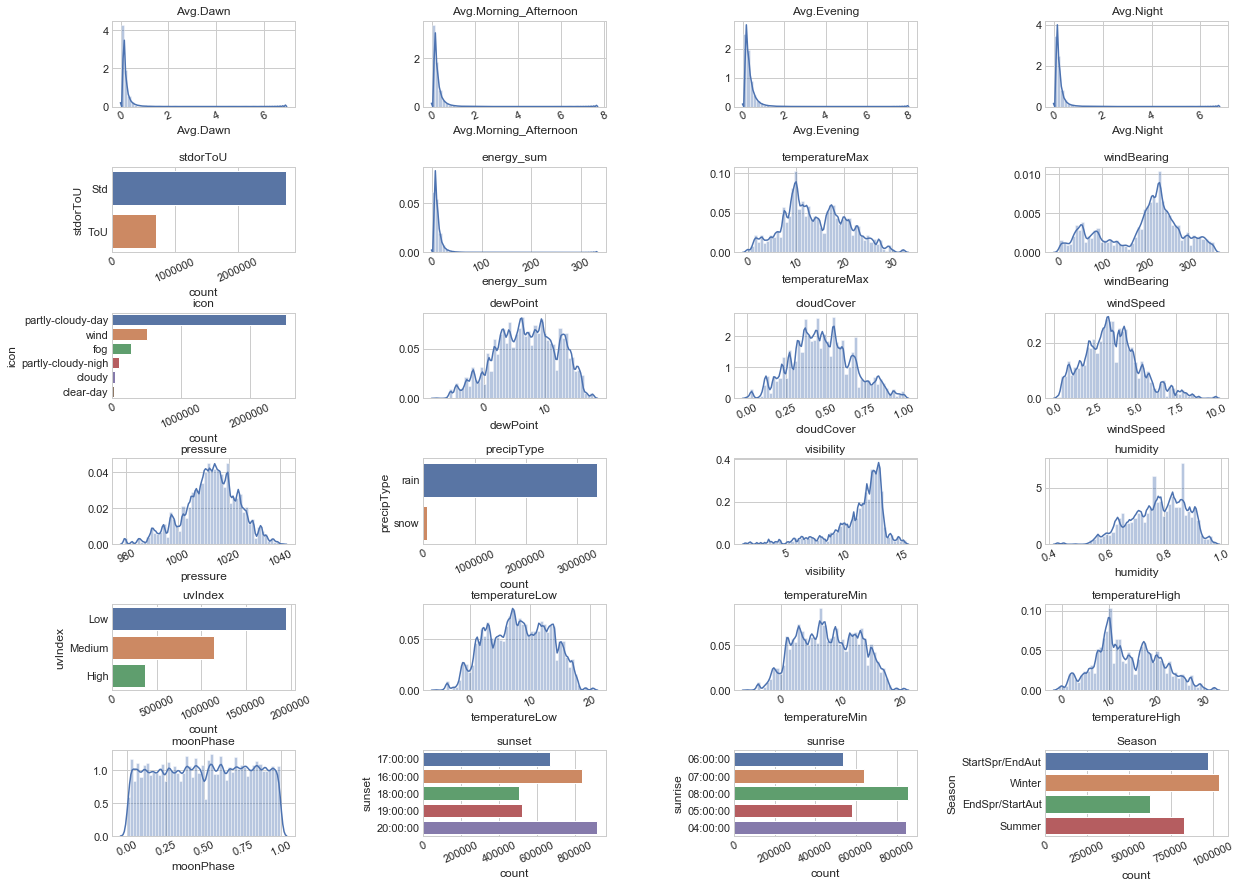

In [12]:
#Plot distributions of each feature (from: Daniel Martinez)
def plot_distribution(dataset, cols=4, width=20, height=15, hspace=0.7, wspace=0.7):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(energy_df.drop(['LCLid','day','Acorn', 'Acorn_grouped', 'holiday'], axis = 1))

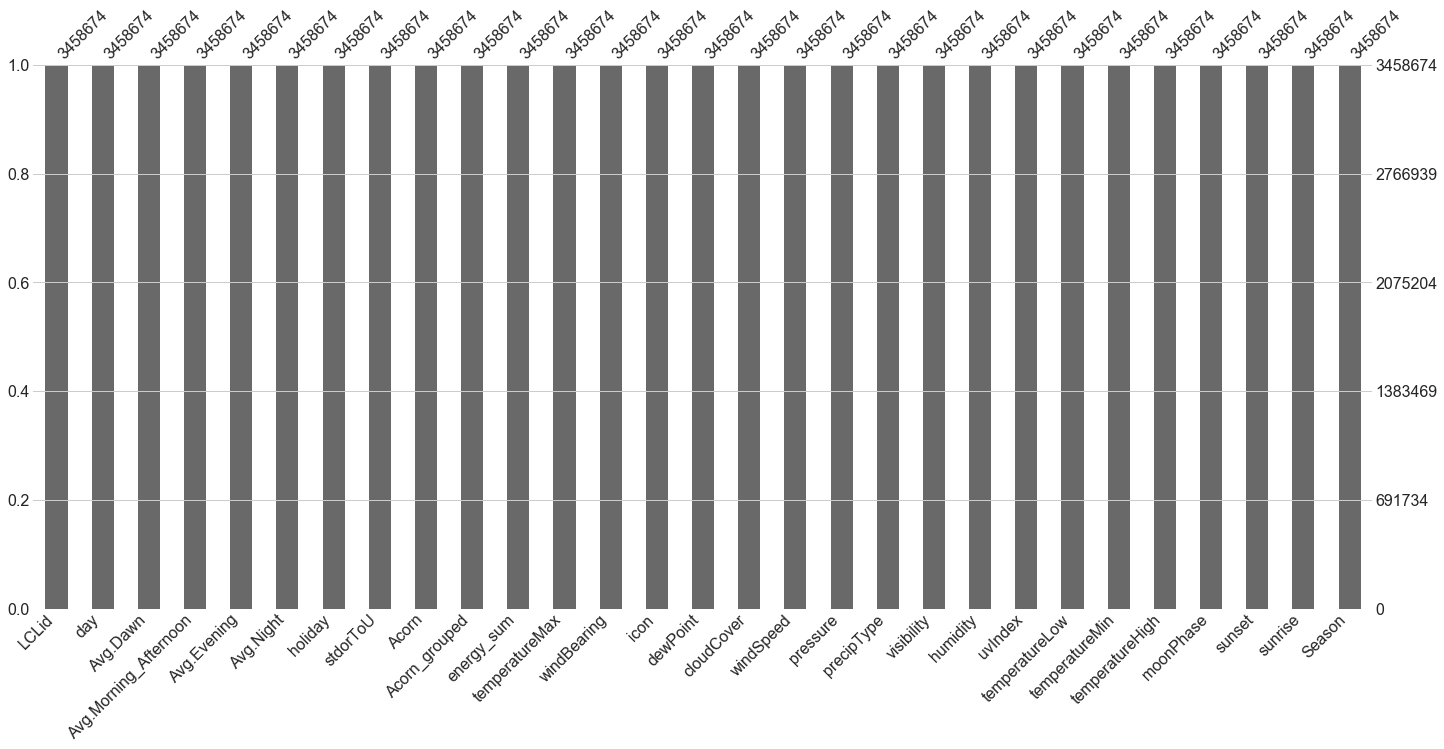

In [13]:
# Checking for Missing Values
missingno.bar(energy_df)

In [14]:
#Function to retrieve outliers
def find_outliers(dataset):
    
    outliers = {}
    
    for i in list(dataset.loc[:, dataset.dtypes != np.object]):
        Q1 = dataset[i].quantile(0.25)
        Q3 = dataset[i].quantile(0.75)
        IQR = Q3 - Q1
        num_outliers = ((dataset[i] < (Q1 - 1.5 * IQR)) | (dataset[i] > (Q3 + 1.5 * IQR)))
        outliers[i] = num_outliers
        
    return outliers

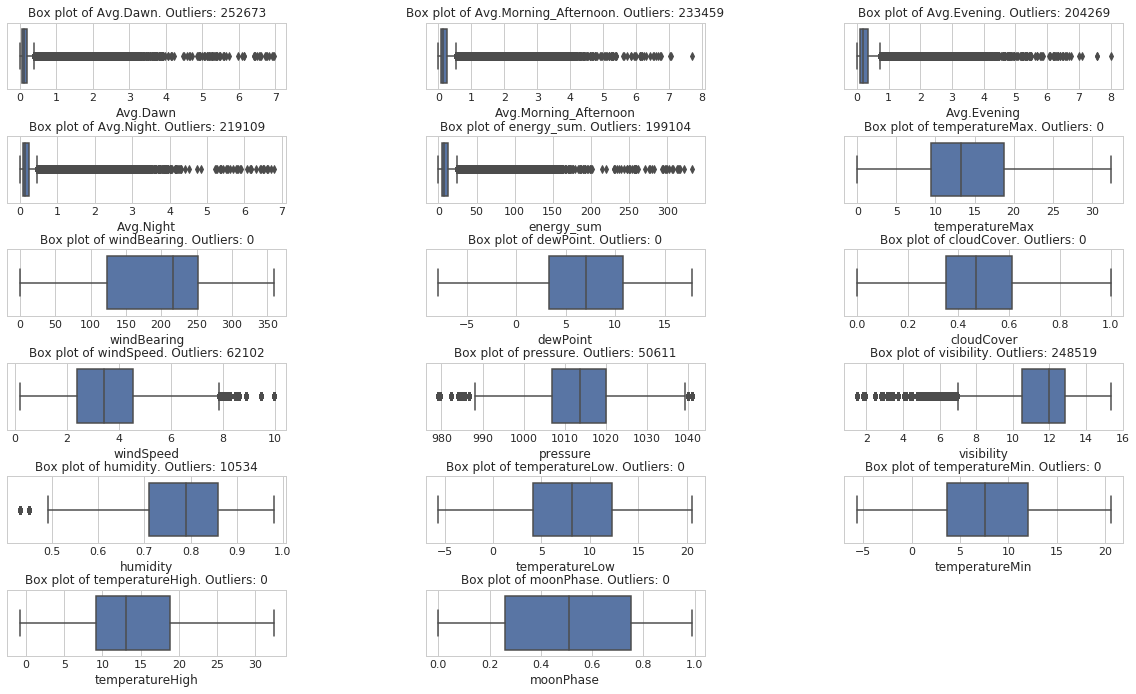

In [15]:
#Testing for outliers
def plot_box(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    outliers = find_outliers(dataset)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(outliers.keys()):
        ax = fig.add_subplot(rows, cols, i + 1)
        g = sns.boxplot(dataset[column])
        ax.set_title('Box plot of {}. Outliers: {}'.format(column, outliers[column].sum()))
    
plot_box(energy_df.drop('holiday', axis=1), cols=3, width=20, height=20, hspace=0.7, wspace=0.5)
plt.style.use('default')

<div class="alert alert-block alert-info">
    We have identified that <b>'visibility'</b> presents a high number of outliers (given that its skewed to the left). We will further explore these outliers to verify if their values make sense. Given that visibility can change significantly during certain days of the year, removing these would not be pertinent (unless they are unreasonable values). Moreover, we have identified outliers in <b>'energy_sum', 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening'</b>, and <b>'Avg.Night'</b>. We will also explore these values to verify if they are reasonable given the scale and nature of the data.
</div>
    <div>
    

In [16]:
# Dictionary of Boolean masks of outliers per column
outliers_dict = find_outliers(energy_df)

<div class="alert alert-block alert-info">
Given that visibility can change significantly during certain days of the year, removing these would not be pertinent (unless they are unreasonable values). In this case, it is evidenced that most of the outliers occur in <b> Winter </b>  and <b> StartAut/Spr</b> which makes makes sense as visibility decreases during colder periods.
    <div>

- **Multivariate Analysis**

In [17]:
# Function for plotting outliers vs Season
def outliers_vs_season(column):
    outliers = energy_df[outliers_dict[column] == True]
    outlier_season = outliers.groupby('Season')[column].size()
    
    num_outliers = []
    seasons = ['Winter', 'Summer', 'StartSpr/EndAut', 'EndSpr/StartAut']

    for season in seasons:
        num_outliers.append(outlier_season[season])
    
    sns.barplot(seasons, num_outliers)
    plt.title('Number of outliers per Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Outliers:' + str(column))
    plt.show()

In [18]:
energy_outliers = energy_df[outliers_dict['energy_sum'] == True]
energy_outliers_df = pd.DataFrame(energy_outliers[['LCLid', 'Season', 'energy_sum', 'Acorn']])

In [19]:
pivot = pd.pivot_table(energy_outliers_df, index=['Acorn', 'Season'], values=['energy_sum', 'LCLid'], aggfunc=lambda x: len(x.unique()))
pivot['Energy per Household'] = pivot['energy_sum'] / pivot['LCLid']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pivot)

LCLid  energy_sum  Energy per Household
Acorn   Season                                                  
ACORN-A EndSpr/StartAut     84      2698.0             32.119048
        StartSpr/EndAut    105      5856.0             55.771429
        Summer              80      2986.0             37.325000
        Winter             122      8216.0             67.344262
ACORN-B EndSpr/StartAut      9        94.0             10.444444
        StartSpr/EndAut     14       348.0             24.857143
        Summer               6        70.0             11.666667
        Winter              17       654.0             38.470588
ACORN-C EndSpr/StartAut     47       708.0             15.063830
        StartSpr/EndAut     63      2022.0             32.095238
        Summer              35       724.0             20.685714
        Winter              80      3388.0             42.350000
ACORN-D EndSpr/StartAut    121      2580.0             21.322314
        StartSpr/EndAut    152      6743.0             44.361842
        Summer             100      3039.0             30.390000
        Winter             177      9552.0             53.966102
ACORN-E EndSpr/StartAut    429      8814.0             20.545455
        StartSpr/EndAut    569     24133.0             42.413005
        Summer             334      9075.0             27.170659
        Winter             636     33666.0             52.933962
ACORN-F EndSpr/StartAut    114      1310.0             11.491228
        StartSpr/EndAut    181      4343.0             23.994475
        Summer              87      1241.0             14.264368
        Winter             216      6946.0             32.157407
ACORN-G EndSpr/StartAut     44       488.0             11.090909
        StartSpr/EndAut     69      1562.0             22.637681
        Summer              23       440.0             19.130435
        Winter              85      2706.0             31.835294
ACORN-H EndSpr/StartAut    108      1124.0             10.407407
        StartSpr/EndAut    162      3681.0             22.722222
        Summer              71      1122.0             15.802817
        Winter             211      6318.0             29.943128
ACORN-I EndSpr/StartAut     10        80.0              8.000000
        StartSpr/EndAut     14       276.0             19.714286
        Summer               6        59.0              9.833333
        Winter              14       453.0             32.357143
ACORN-J EndSpr/StartAut     31       552.0             17.806452
        StartSpr/EndAut     50      1763.0             35.260000
        Summer              17       336.0             19.764706
        Winter              48      2668.0             55.583333
ACORN-K EndSpr/StartAut     37       319.0              8.621622
        StartSpr/EndAut     54      1067.0             19.759259
        Summer              25       179.0              7.160000
        Winter              64      2003.0             31.296875
ACORN-L EndSpr/StartAut     53       616.0             11.622642
        StartSpr/EndAut     87      1968.0             22.620690
        Summer              43       491.0             11.418605
        Winter             127      3500.0             27.559055
ACORN-M EndSpr/StartAut     21       248.0             11.809524
        StartSpr/EndAut     34       985.0             28.970588
        Summer              18       164.0              9.111111
        Winter              42      1747.0             41.595238
ACORN-N EndSpr/StartAut     19       188.0              9.894737
        StartSpr/EndAut     33       599.0             18.151515
        Summer              15       144.0              9.600000
        Winter              41      1125.0             27.439024
ACORN-O EndSpr/StartAut     18       110.0              6.111111
        StartSpr/EndAut     23       400.0             17.391304
        Summer              11        54.0              4.909091
        Winter              31       696.0             22.45

In [20]:
(max(energy_df['energy_sum']) - np.mean(energy_df['energy_sum'])) / np.std(energy_df['energy_sum'])

35.311007482390444

In [21]:
boundary = np.mean(energy_df['energy_sum']) + 5 * np.std(energy_df['energy_sum'])
ala = energy_outliers_df[energy_outliers_df['energy_sum'] > boundary]['LCLid'].value_counts() 
ala[ala < 30]

MAC004400    29
MAC001766    29
MAC003749    29
MAC004958    29
MAC001987    27
             ..
MAC004709     1
MAC003856     1
MAC004509     1
MAC003768     1
MAC001032     1
Name: LCLid, Length: 321, dtype: int64

In [22]:
boundary = np.mean(energy_df['energy_sum']) + 5 * np.std(energy_df['energy_sum'])
energy_outliers_df[energy_outliers_df['energy_sum'] > boundary]['LCLid'].value_counts()

MAC004179    644
MAC000557    522
MAC005406    509
MAC003329    445
MAC004593    369
            ... 
MAC004709      1
MAC003856      1
MAC004509      1
MAC003768      1
MAC001032      1
Name: LCLid, Length: 442, dtype: int64

In [23]:
energy_outliers_df.shape[0]/energy_df.shape[0]

0.05756657030989333

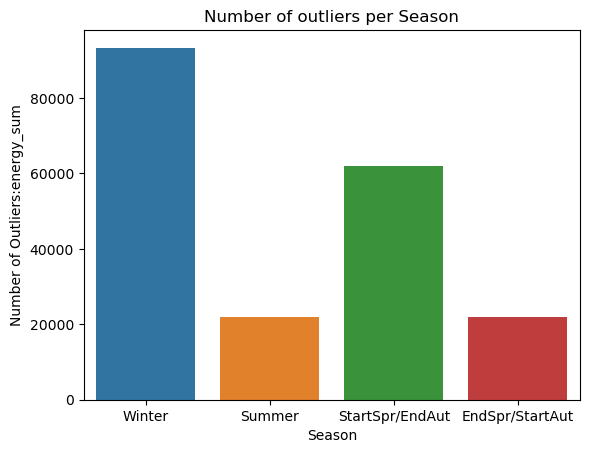

In [24]:
# Analysis Energy Outliers
outliers_vs_season('energy_sum')

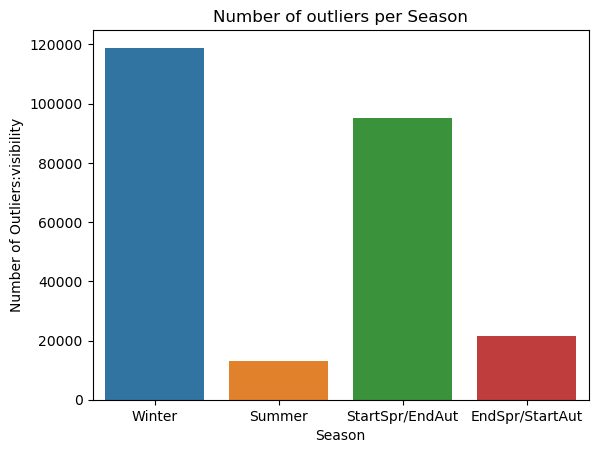

In [25]:
# Analysis Visibility Outliers
outliers_vs_season('visibility')

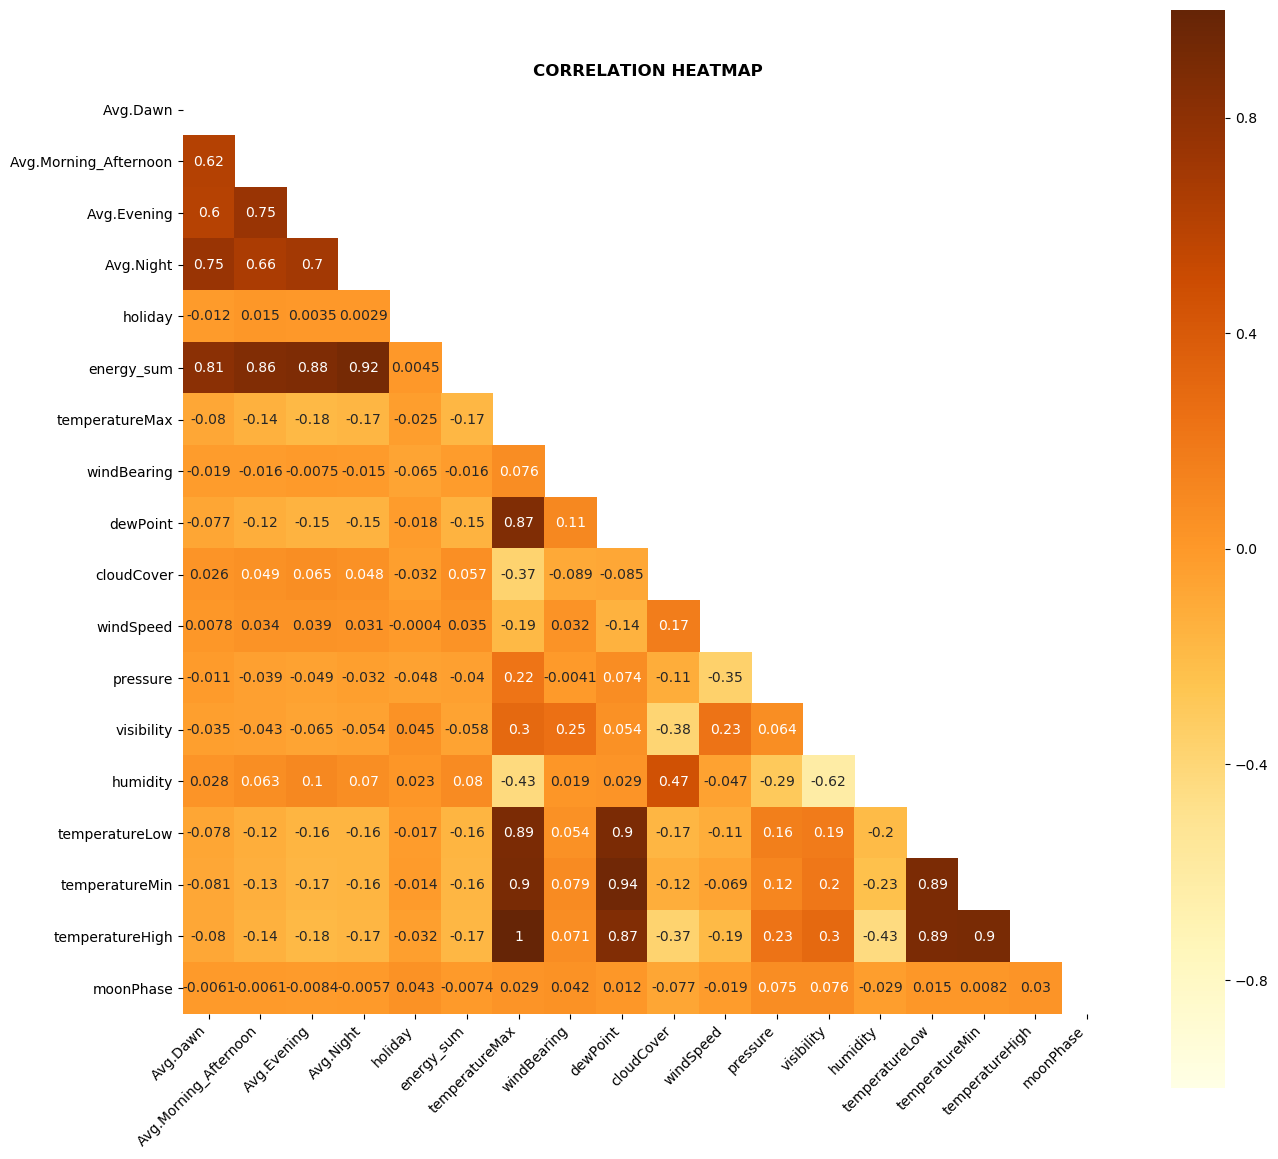

In [26]:
#Checking for correlations between variables
corr = energy_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 14))
ax = sns.heatmap(
    corr, mask = mask, 
    vmin=-1, vmax=1, center=0,
    cmap = 'YlOrBr',
    square=True,
    annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

plt.title('CORRELATION HEATMAP', fontweight="bold")
plt.show()

<div class="alert alert-block alert-info">
    <p>With the correlation heatmap, we identified the following:</p>
        <p>- 'temperatureMax' appears to have a  <b>strong positive correlation</b> (0.85 +) with 'temperatureLow', 'temperatureMin','temperatureHigh', and 'dewPoint'</p>
        <p>- 'dewPoint' appears to have a  <b>strong positive correlation</b> (0.85 +) with 'temperatureLow', 'temperatureMin','temperatureHigh', and 'temperatureMax'</p>
        <p>- 'temperatureLow' appears to have a <b>strong positive correlation</b> (0.85 +) with 'temperatureHigh' and 'temperatureMin'</p>
        <p>- 'temperatureMax' appears to have a <b>strong negative correlation</b> (-0.85 -) with 'energy_sum'</p>
        <p>- 'temperatureMin' appears to have a <b>strong negative correlation</b> (0.80+) with 'energy_sum'</p>
        <p>- 'temperatureHigh' appears to have a <b>strong negative correlation</b> (0.80+) with 'energy_sum'</p>
    <p>- 'energy_sum' appears to have a <b>strong positive correlation</b> (0.80+) with 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', and 'Avg.Night'</p>
</div>

In [27]:
#Pairplot of features with strong negative/positive correlation
corr_features1 = ['temperatureMax', 'temperatureLow', 'temperatureMin', 'temperatureHigh', 'dewPoint']
corr_features2 = ['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', 'energy_sum']

In [ ]:
#First pairplot of features with strong negative/positive correlation
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[corr_features1], diag_kind="kde")
plt.show()

In [ ]:
#Second pairplot of features with strong negative/positive correlation
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[corr_features2], diag_kind="kde")
plt.show()

<div class="alert alert-block alert-info">
    <p>- 'temperatureMax' was selected out of the other variables for the following reasons: 1) reduce high dimensionality, 2) hotter days have higher minimum temperatures, and  3) 'temperatureLow' and 'temperatureHigh' showed a similar behaviour to 'temperatureMin' and 'temperatureMax' (these information is contained within 'temperatureMax') </p>
    <p>- We have identified a very strong correlation between 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', and 'energy_sum'. Nevertheless, we decided to keep all these features for modelling but we will keep in mind this findings in order to avoid undesired outcomes due to the correlation. </p>
</div>

In [100]:
#Drop highly correlated features 
energy_df.drop(['temperatureLow', 'temperatureMin', 'temperatureHigh', 'dewPoint'], axis = 1, inplace = True)

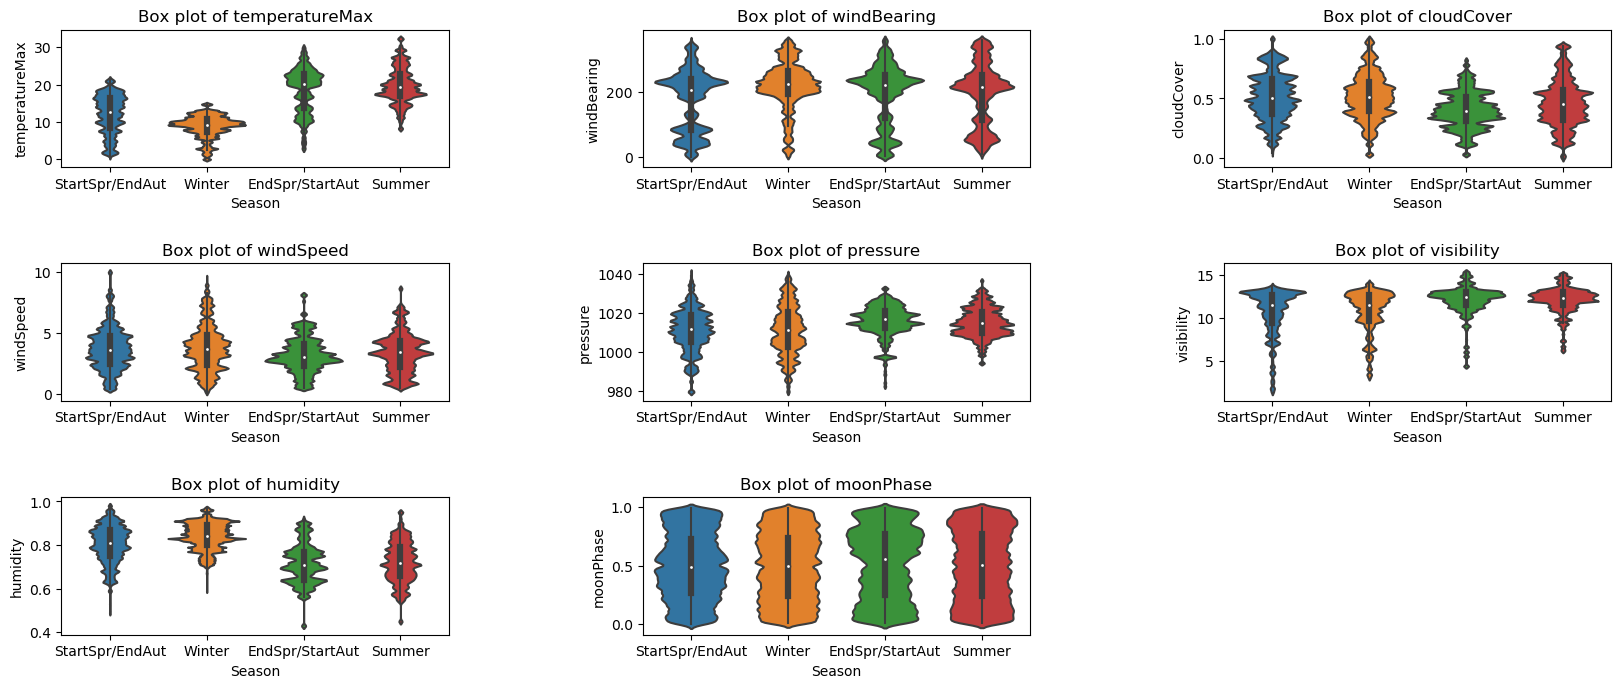

In [29]:
#Violin plots of features respect to their corresponding season
def plot_violin(dataset, cols=3, width=20, height=20, hspace=0.7, wspace=0.5):
    
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(list(dataset.loc[:, dataset.dtypes != np.object])):
        ax = fig.add_subplot(rows, cols, i + 1)
        g = sns.violinplot(x='Season', y = column, data = dataset)
        ax.set_title('Box plot of {}'.format(column))

plot_violin(energy_df.drop(['holiday', 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', 'Avg.Night', 'energy_sum'], axis=1))
plt.style.use('default')

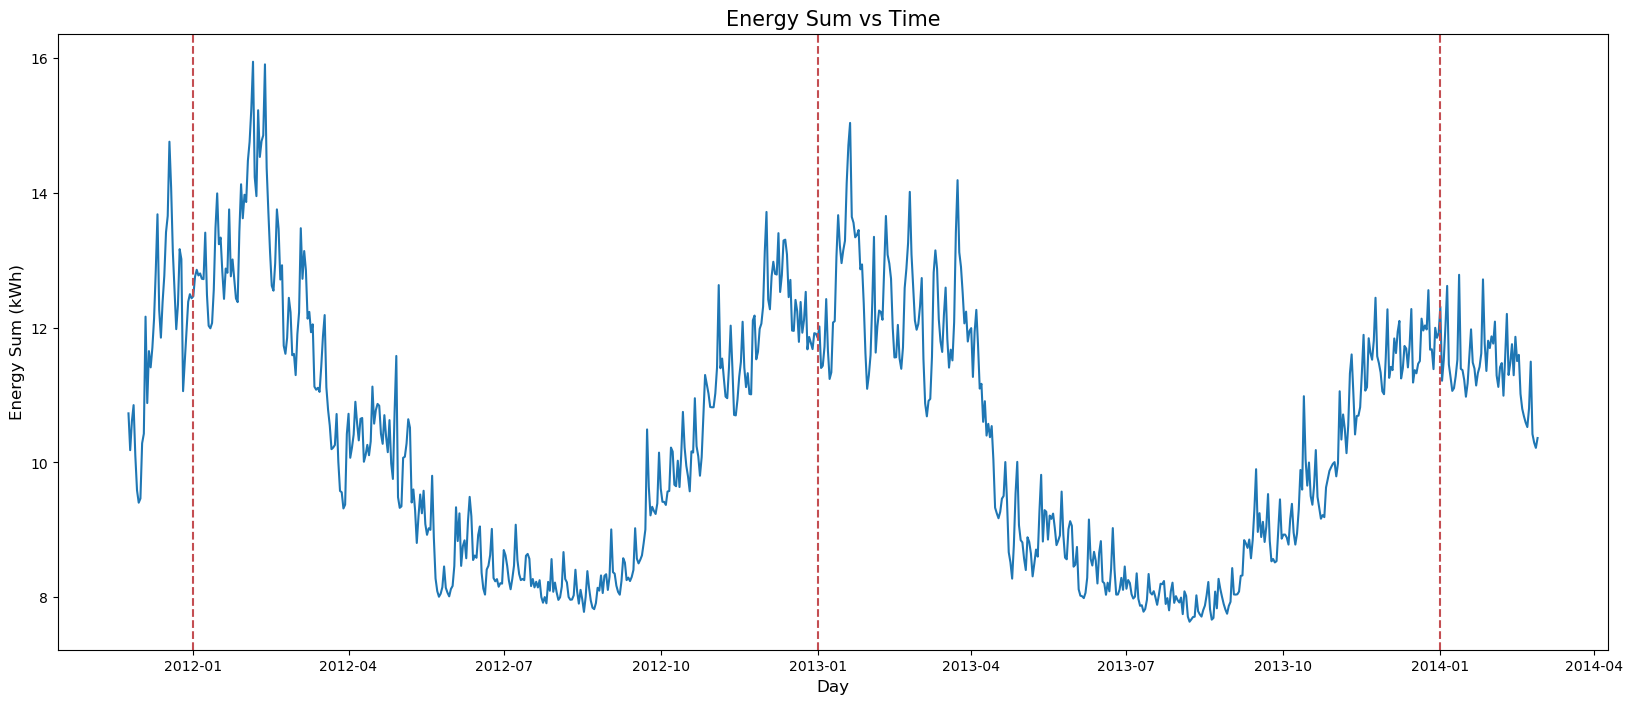

In [30]:
#Energy sum vs Time
plt.style.use('default')

energy_df['day'] = pd.to_datetime(energy_df['day'])
day = pd.DataFrame(energy_df.groupby('day'))

# Plot day vs energy_sum
plt.figure(figsize=(20, 8))

plt.plot(day[0], energy_df.groupby('day').mean()['energy_sum'])
plt.title('Energy Sum vs Time', fontsize = 15)
plt.ylabel('Energy Sum (kWh)', fontsize = 12)
plt.xlabel('Day', fontsize = 12)

xcoords = ['2012-01-01', '2013-01-01', '2014-01-01']
for xc in xcoords:
    x = pd.to_datetime(xc)
    plt.axvline(x=x.date(), color = 'r', linestyle = '--')
    
plt.show()

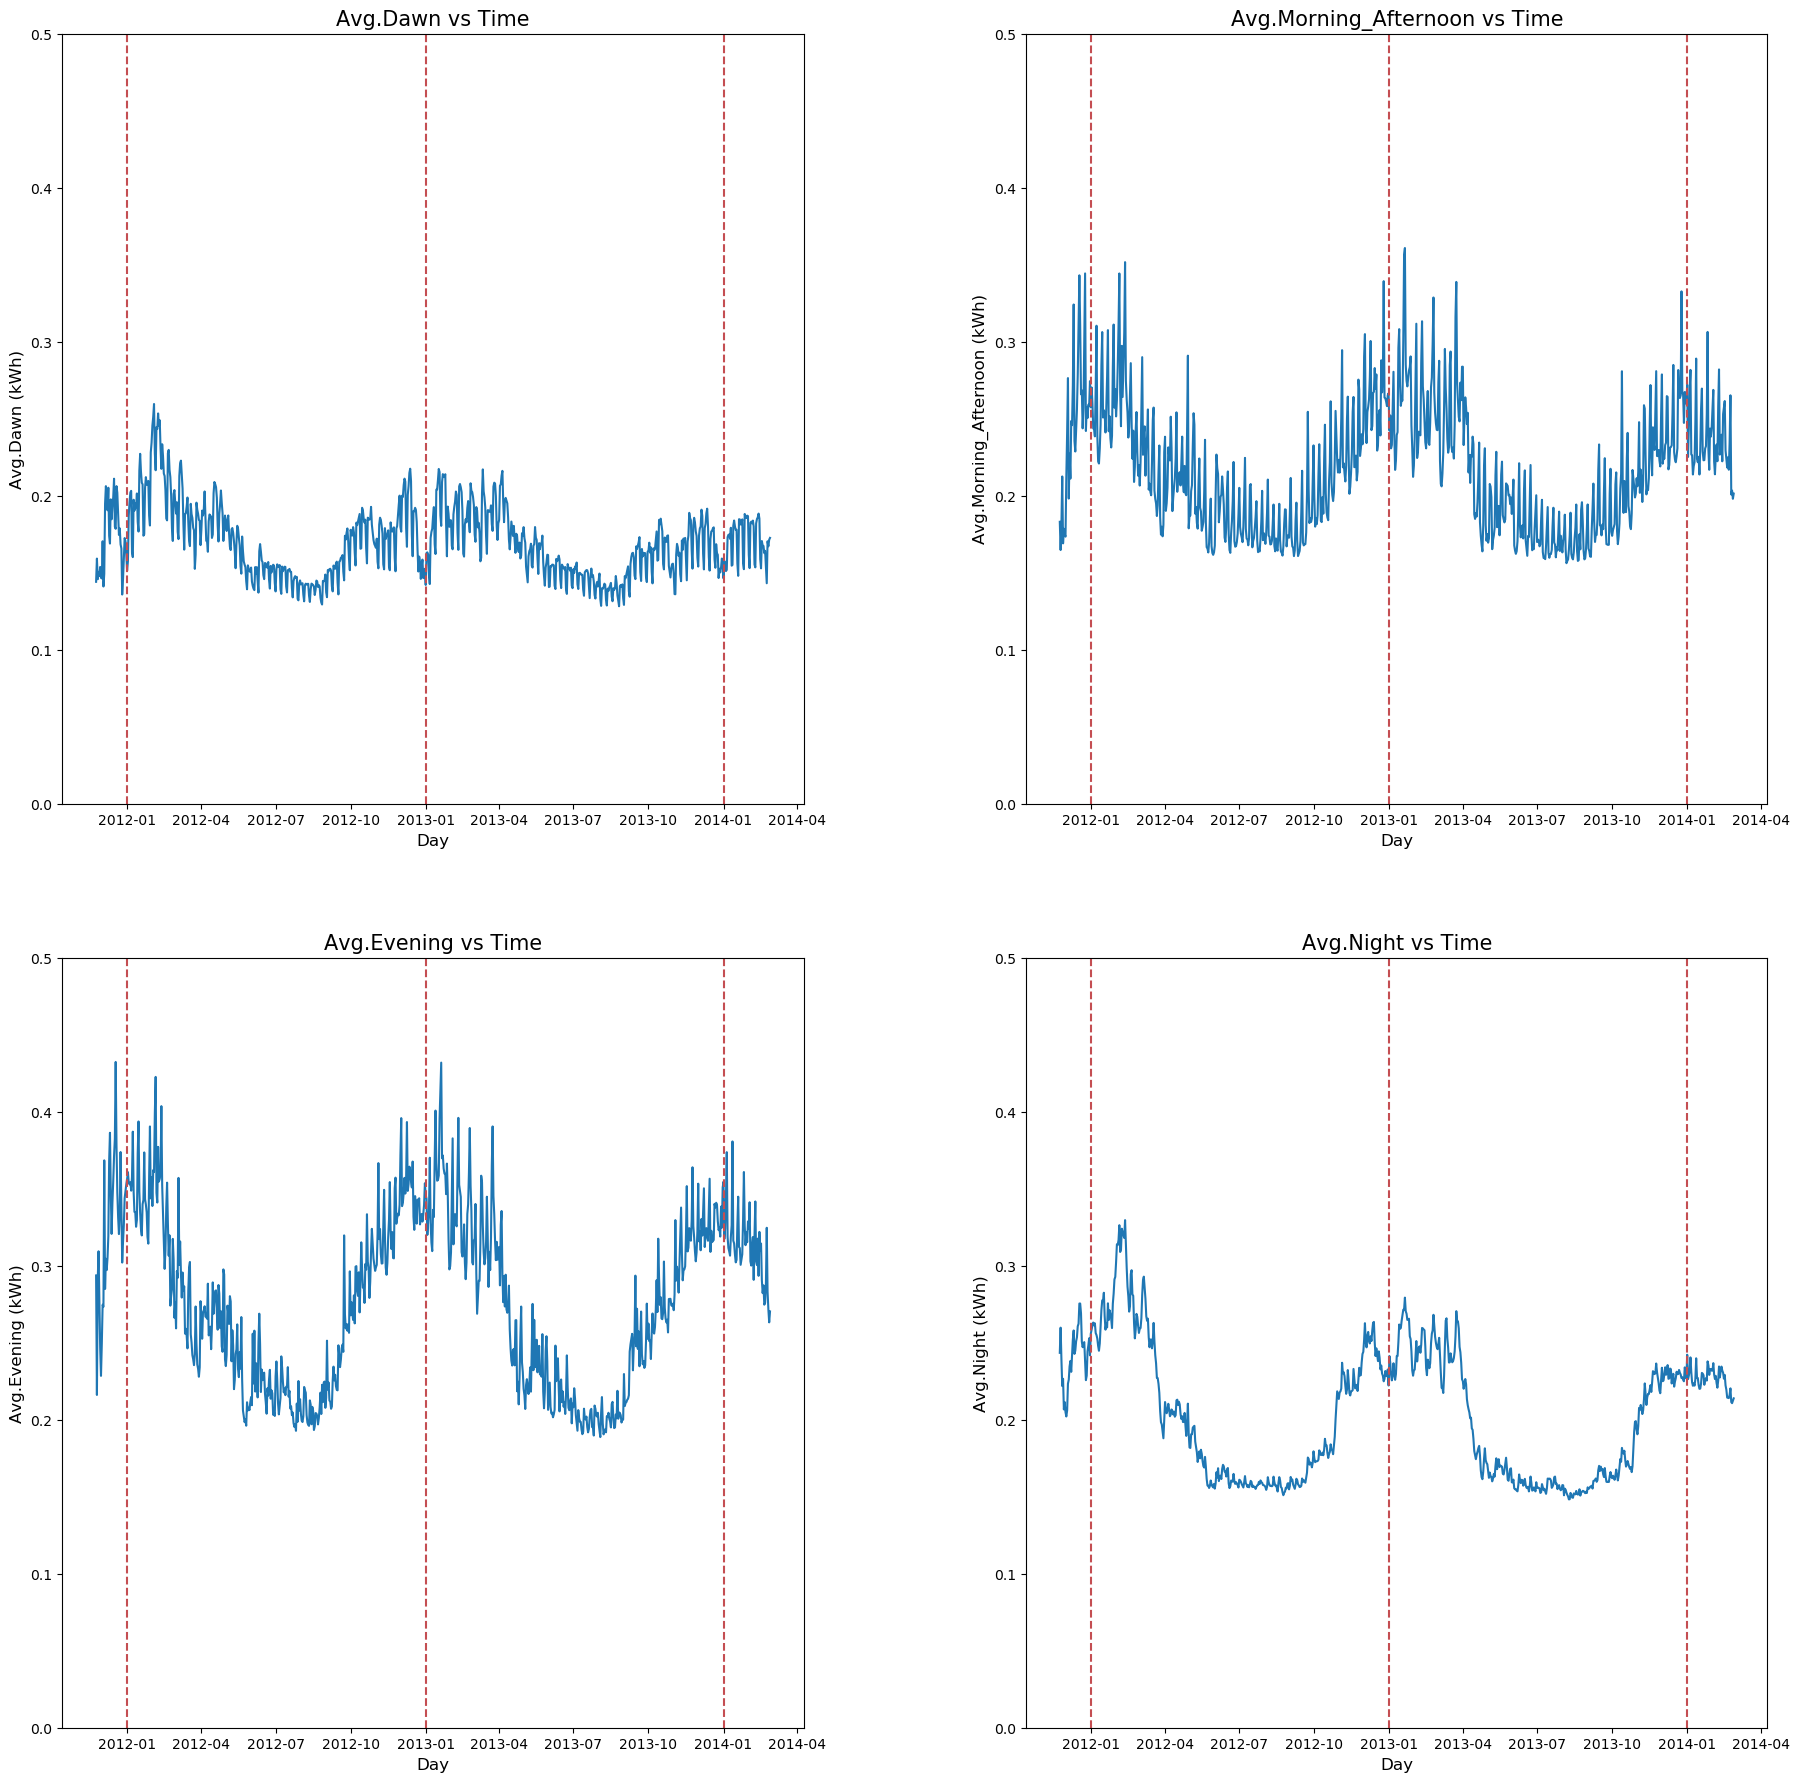

In [31]:
#Averages per time of day vs Time
plt.style.use('default')

energy_df['day'] = pd.to_datetime(energy_df['day'])
day = pd.DataFrame(energy_df.groupby('day'))

# Plot day vs energy_sum

fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    ax = fig.add_subplot(2, 2, i + 1)
    plt.plot(day[0], energy_df.groupby('day').mean()[column])
    ax.set_title('{} vs Time'.format(column), fontsize = 15)
    ax.set_ylabel('{} (kWh)'.format(column), fontsize = 12)
    ax.set_xlabel('Day', fontsize = 12)
    ax.set_ylim(0,  0.50)
    #ax.set_xticklabels([])
    
    xcoords = ['2012-01-01', '2013-01-01', '2014-01-01']
    for xc in xcoords:
        x = pd.to_datetime(xc)
        plt.axvline(x=x.date(), color = 'r', linestyle = '--')
        
plt.show()

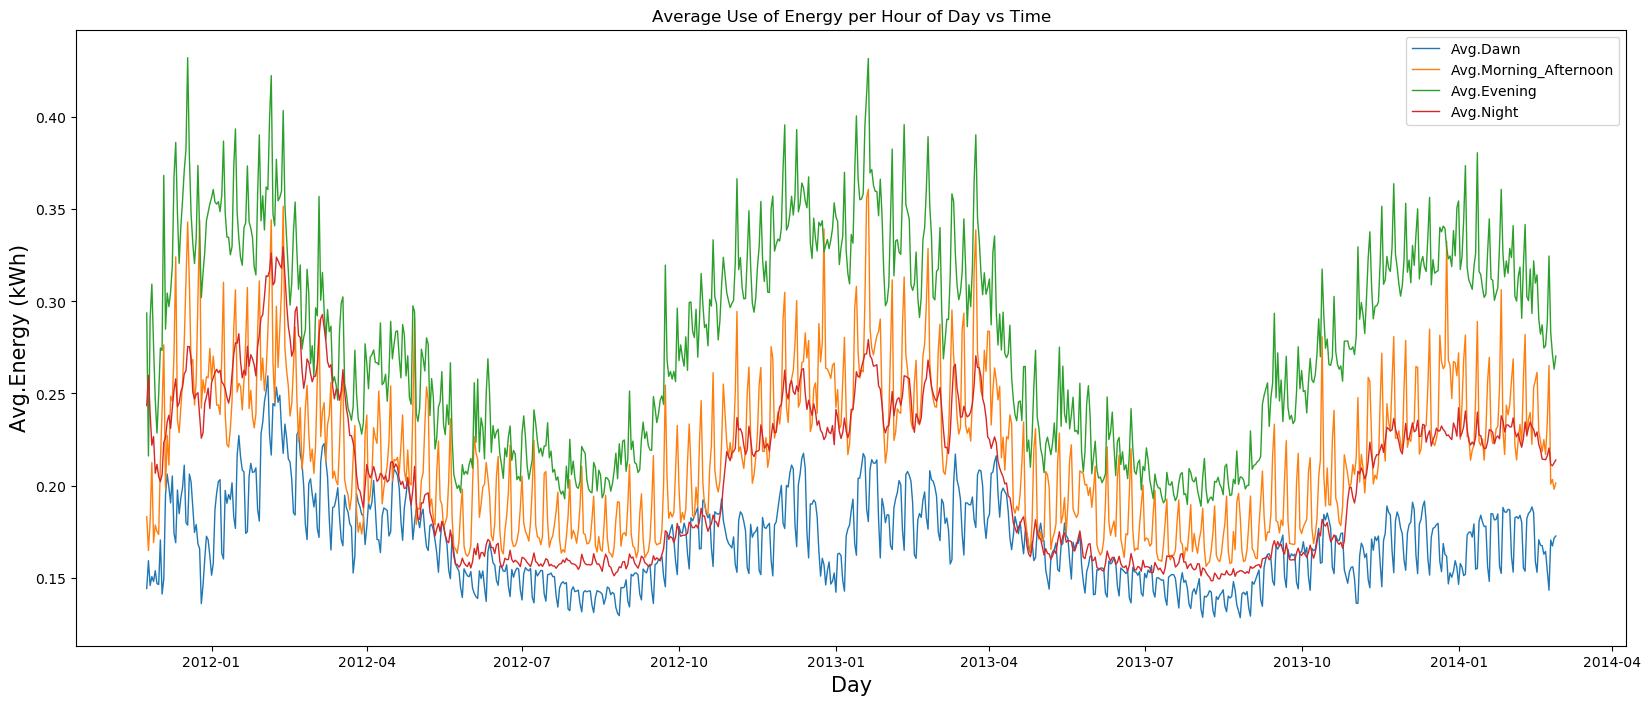

In [32]:
#Averages per time of day vs Time (one plot)
plt.figure(figsize=(20, 8))

for column in ['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']:
    plt.plot(day[0], energy_df.groupby('day').mean()[column], label=column, linewidth = 1)

plt.title('Average Use of Energy per Hour of Day vs Time')
plt.ylabel('Avg.Energy (kWh)', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.legend(loc="upper right")
    
plt.show()

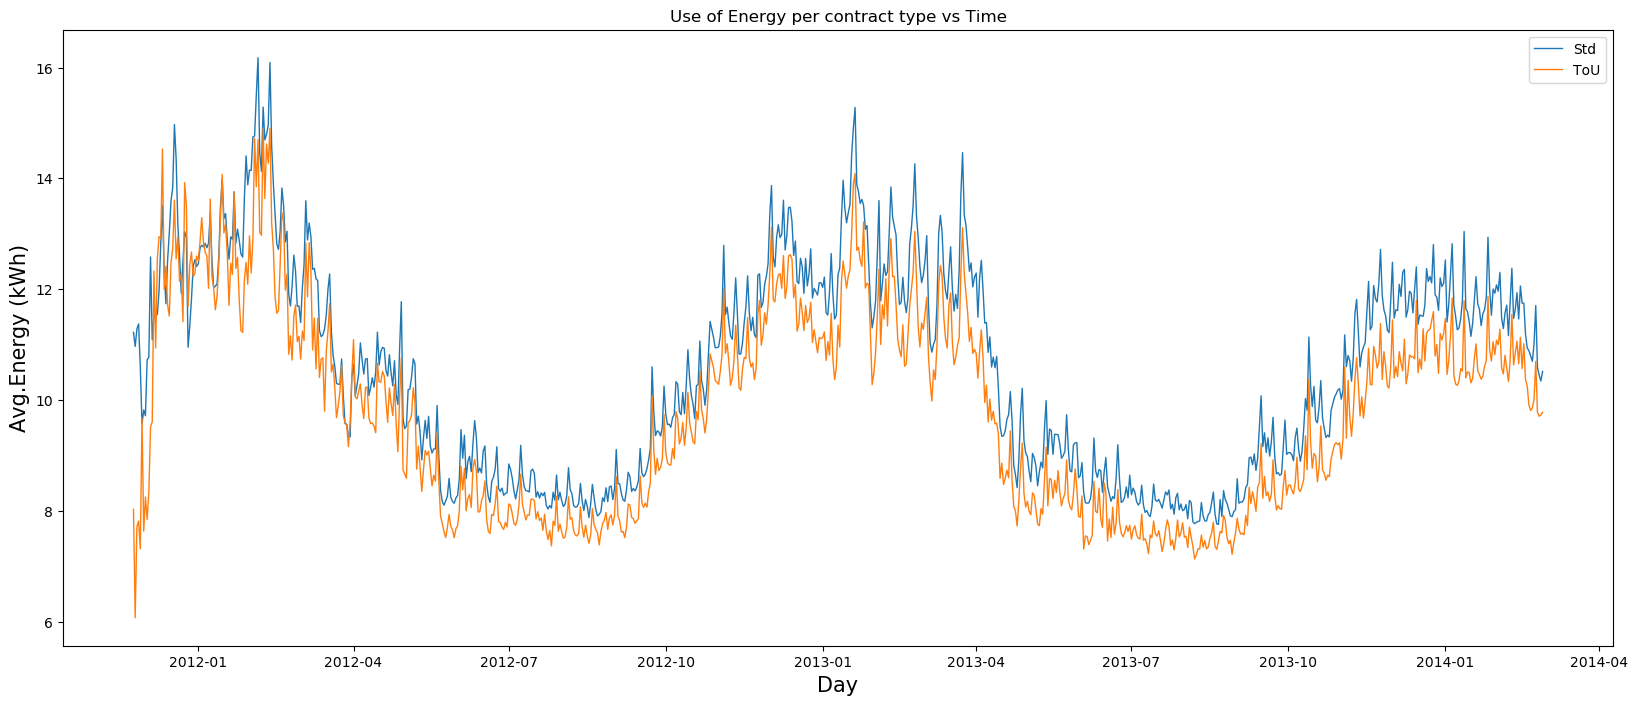

In [33]:
#Energy per Contract Type vs Time
plt.figure(figsize=(20, 8))
for value in ['Std', 'ToU']:
    contract_type = energy_df[energy_df['stdorToU'] == value]
    plt.plot(day[0], contract_type.groupby('day').mean()['energy_sum'], label=value, linewidth = 1)

plt.title('Use of Energy per contract type vs Time')
plt.ylabel('Avg.Energy (kWh)', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.legend(loc="upper right")
    
plt.show()

/Users/omarmartinez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/omarmartinez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/omarmartinez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a pr

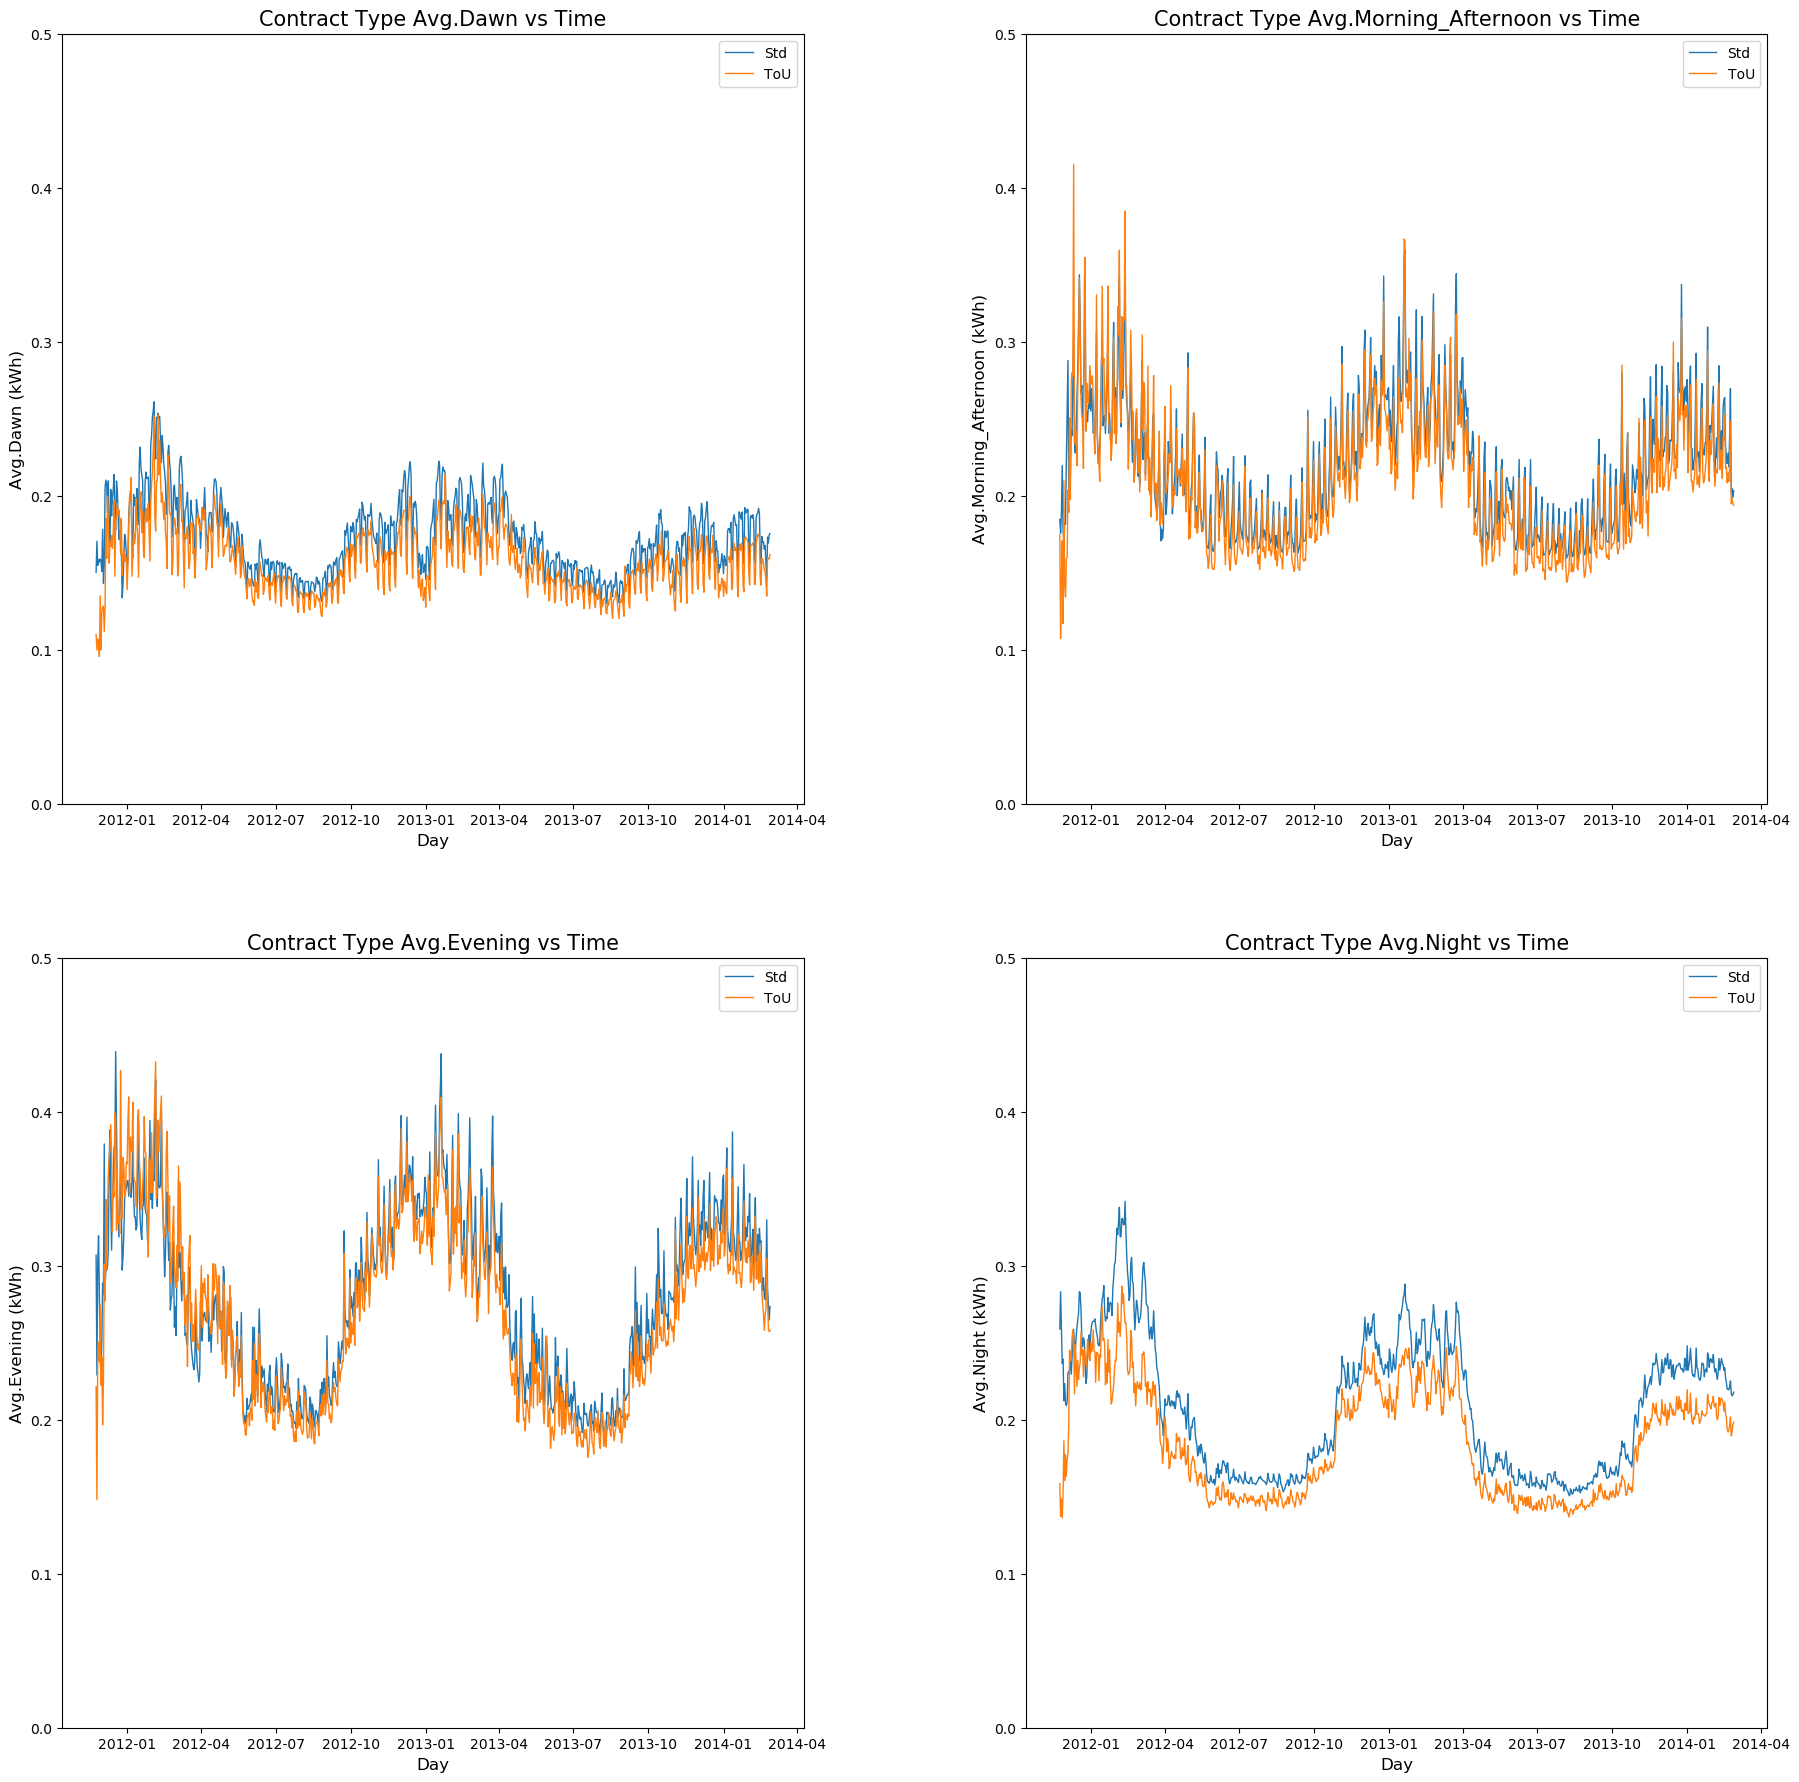

In [34]:
#Averages consumption per contract vs Time
plt.style.use('default')

fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    for value in ['Std', 'ToU']:
        ax = fig.add_subplot(2, 2, i + 1)
        contract_type = energy_df[energy_df['stdorToU'] == value]
        plt.plot(day[0], contract_type.groupby('day').mean()[column], label=value, linewidth = 1)
        ax.set_title('Contract Type {} vs Time'.format(column), fontsize = 15)
        ax.set_ylabel('{} (kWh)'.format(column), fontsize = 12)
        ax.set_xlabel('Day', fontsize = 12)
        #ax.set_xticklabels([])
        ax.set_ylim(0,  0.50)
        plt.legend(loc="upper right")
    
        
plt.show()

In [35]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

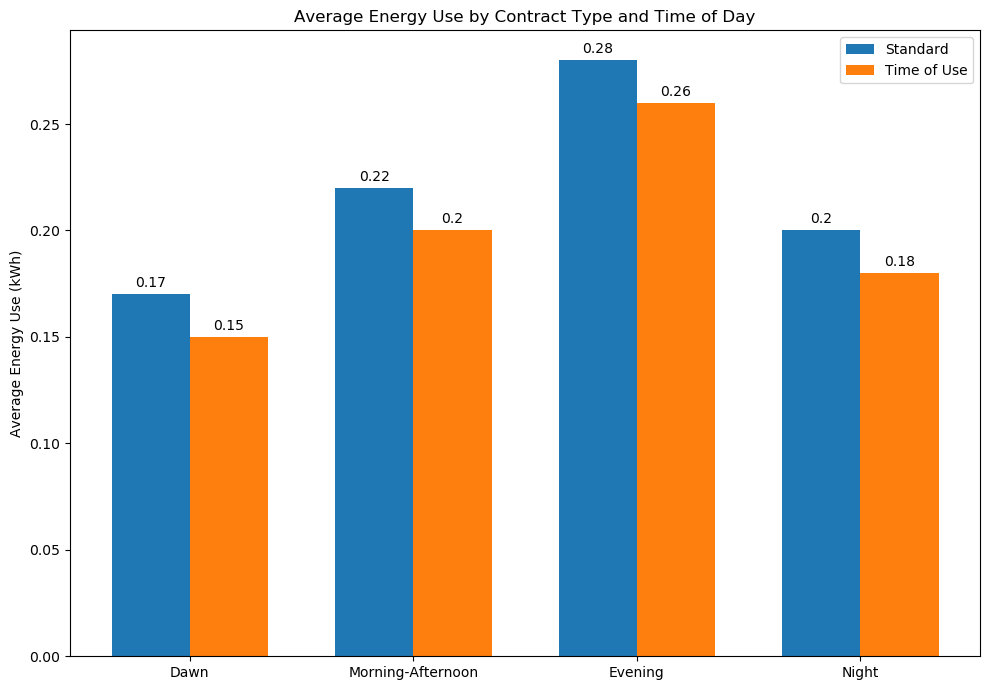

In [36]:
#Average Energy Use by Contract Type and Time of Day
labels = ['Dawn', 'Morning-Afternoon', 'Evening', 'Night']
values = energy_df.groupby('stdorToU').mean()[['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', 'Avg.Night']].to_numpy()
std = list(np.around(values[0],2))
tou = list(np.around(values[1],2))

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, std, width, label='Standard')
rects2 = ax.bar(x + width/2, tou, width, label='Time of Use')

ax.set_ylabel('Average Energy Use (kWh)')
ax.set_title('Average Energy Use by Contract Type and Time of Day')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


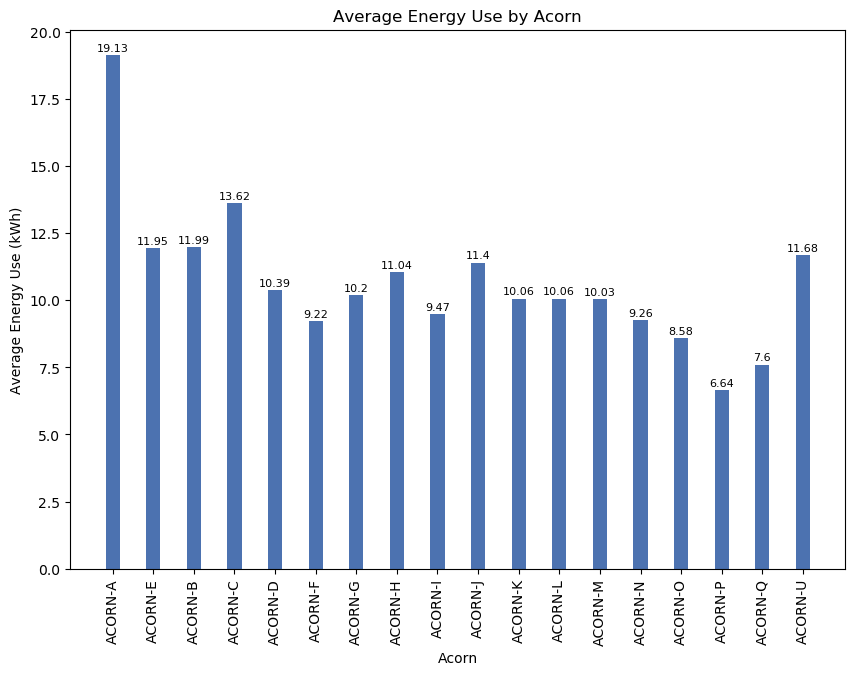

In [37]:
# Average Energy per Acorn
labels_ac = energy_df['Acorn'].unique()
values_ac = energy_df.groupby('Acorn').mean()['energy_sum'].to_numpy()
average = list(np.around(values_ac,2))

fig, ax = plt.subplots(figsize=(10,7))

for i, label in enumerate(labels_ac):
    plt.bar(label, average[i], width = 0.35, label = label, color = 'b')
    plt.text(label, average[i] + 0.15, str(average[i]), horizontalalignment='center', fontsize = 8)
        
plt.title('Average Energy Use by Acorn')
plt.xlabel('Acorn')
plt.ylabel('Average Energy Use (kWh)')
plt.xticks(rotation = 90)

plt.show()

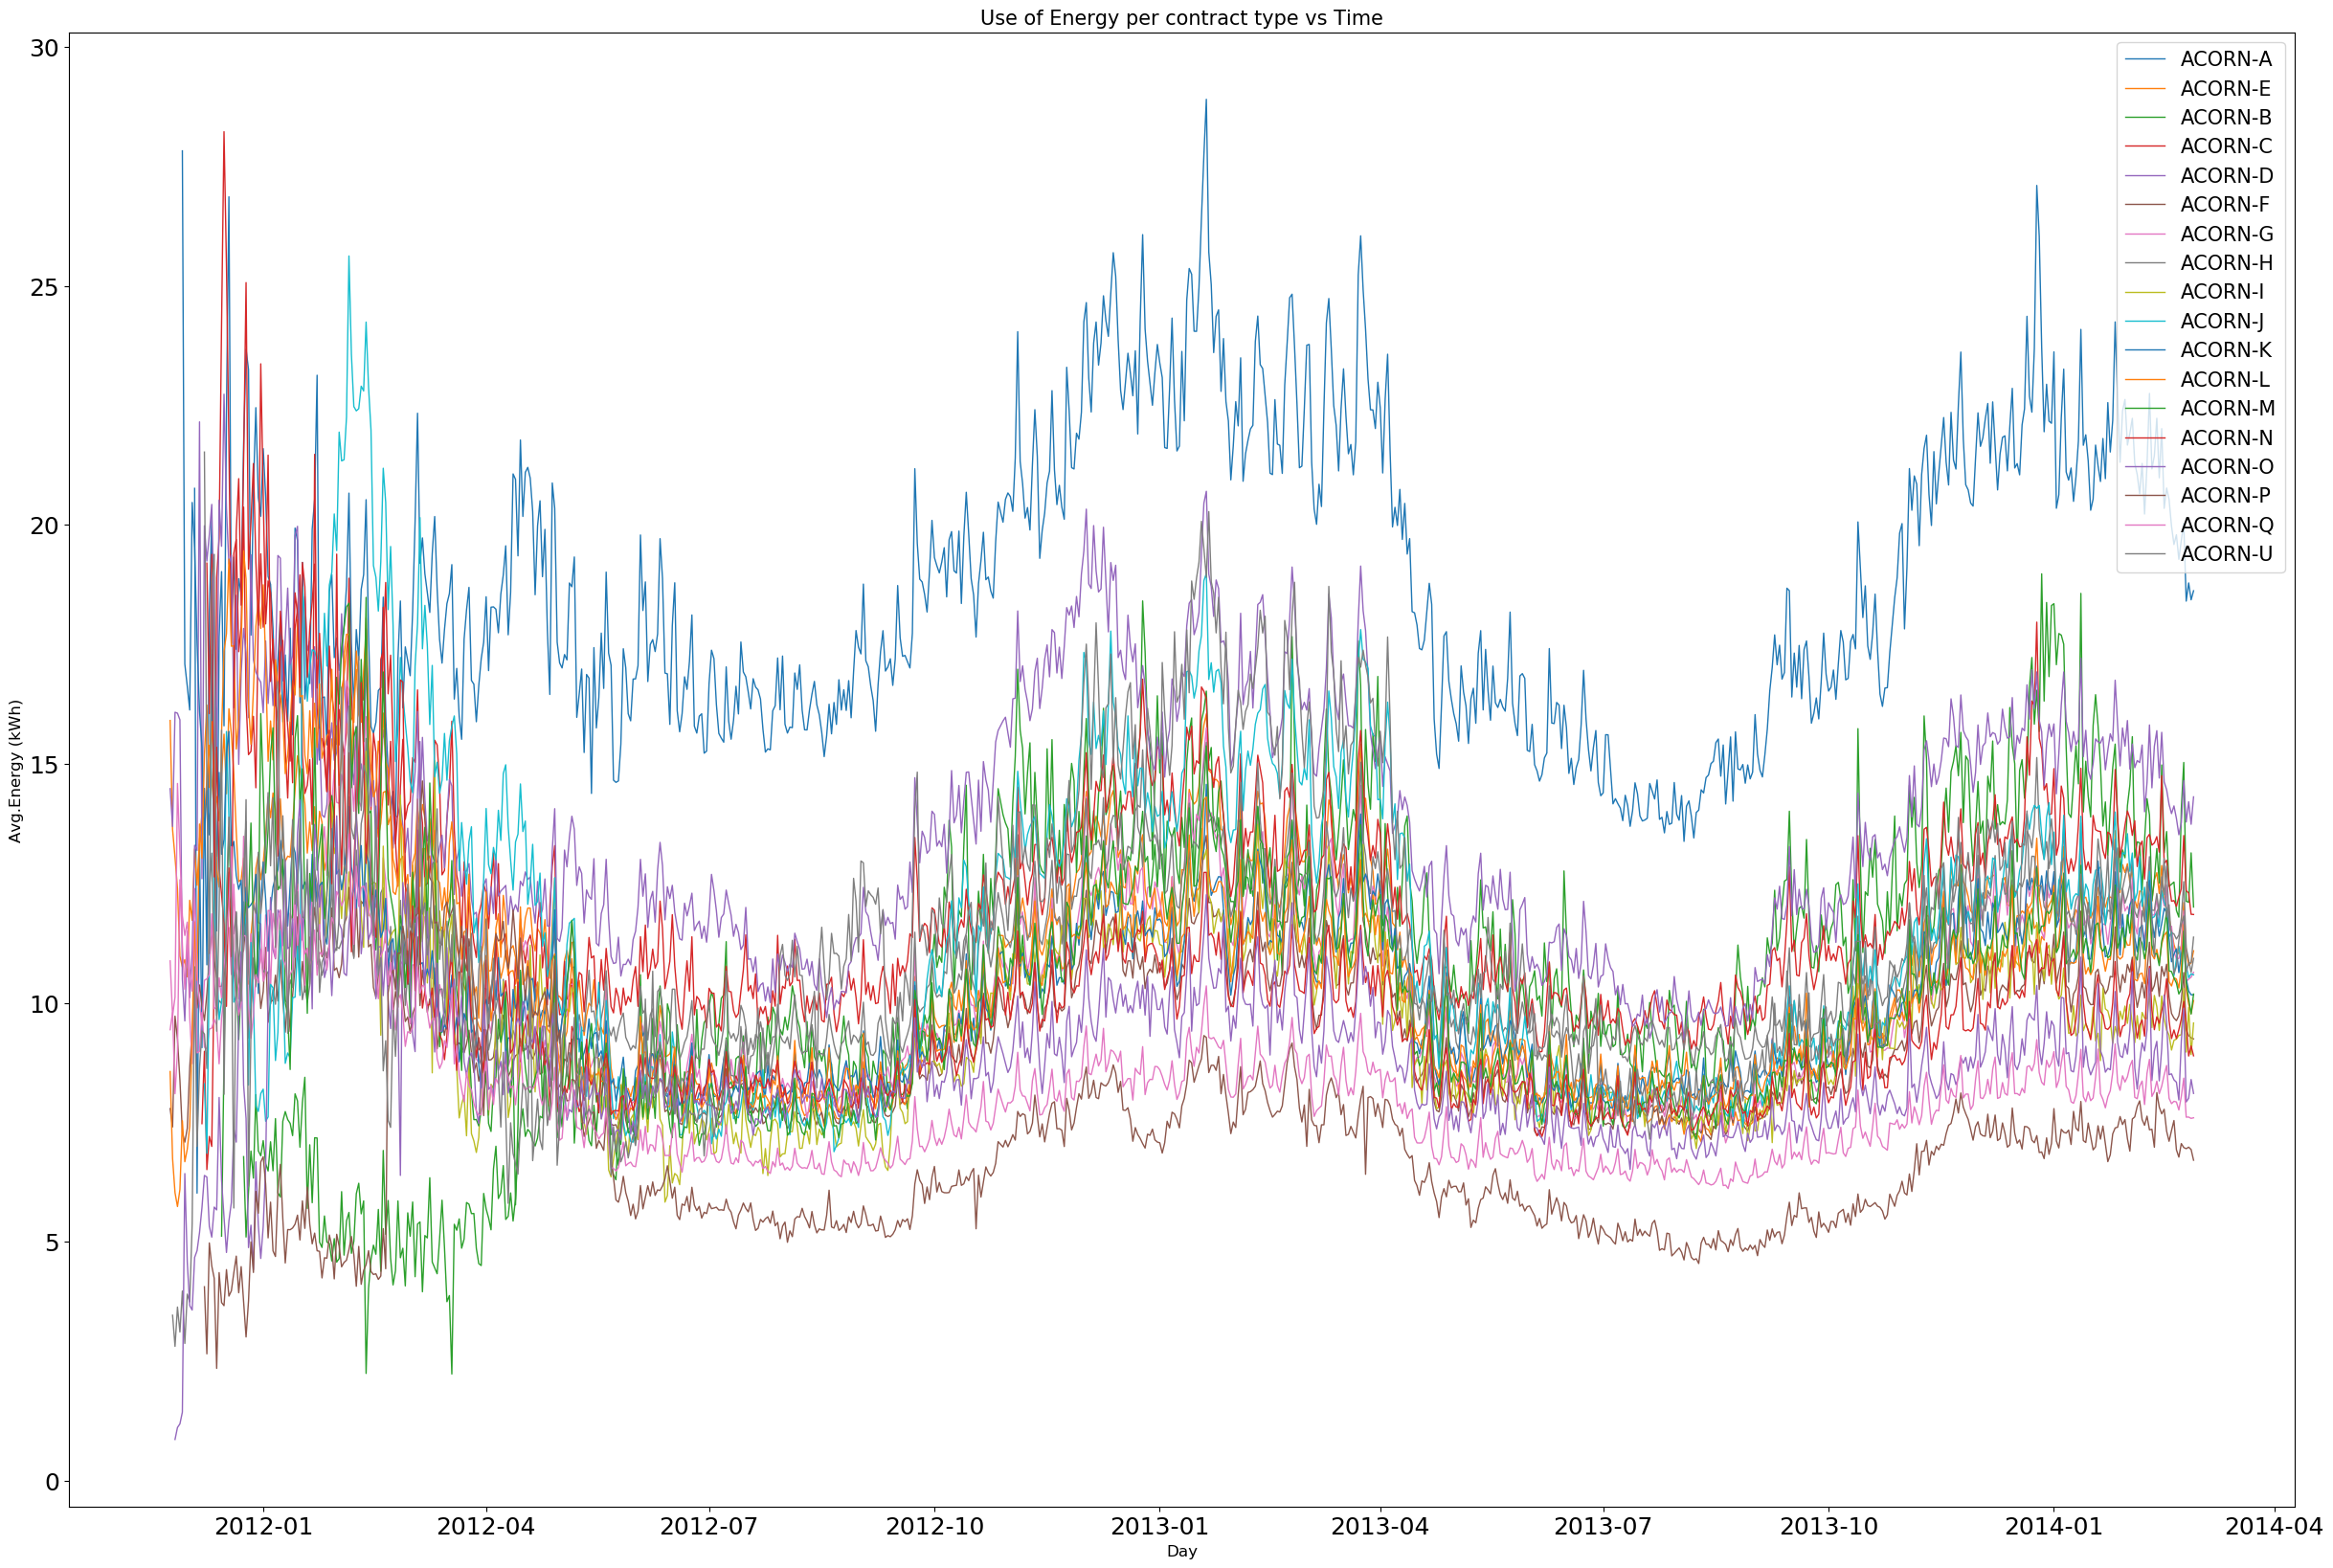

In [38]:
#Energy per Contract Type vs Time
plt.figure(figsize=(30, 20))
for value in energy_df['Acorn'].unique():
    acorn = energy_df[energy_df['Acorn'] == value]
    acorn_df = pd.DataFrame(acorn.groupby('day'))
    plt.plot(acorn_df[0], acorn.groupby('day').mean()['energy_sum'], label=value, linewidth = 1)

plt.title('Use of Energy per contract type vs Time', fontsize = 15)
plt.ylabel('Avg.Energy (kWh)', fontsize = 12)
plt.xlabel('Day', fontsize = 12)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc="upper right", prop={'size': 15})
plt.show()

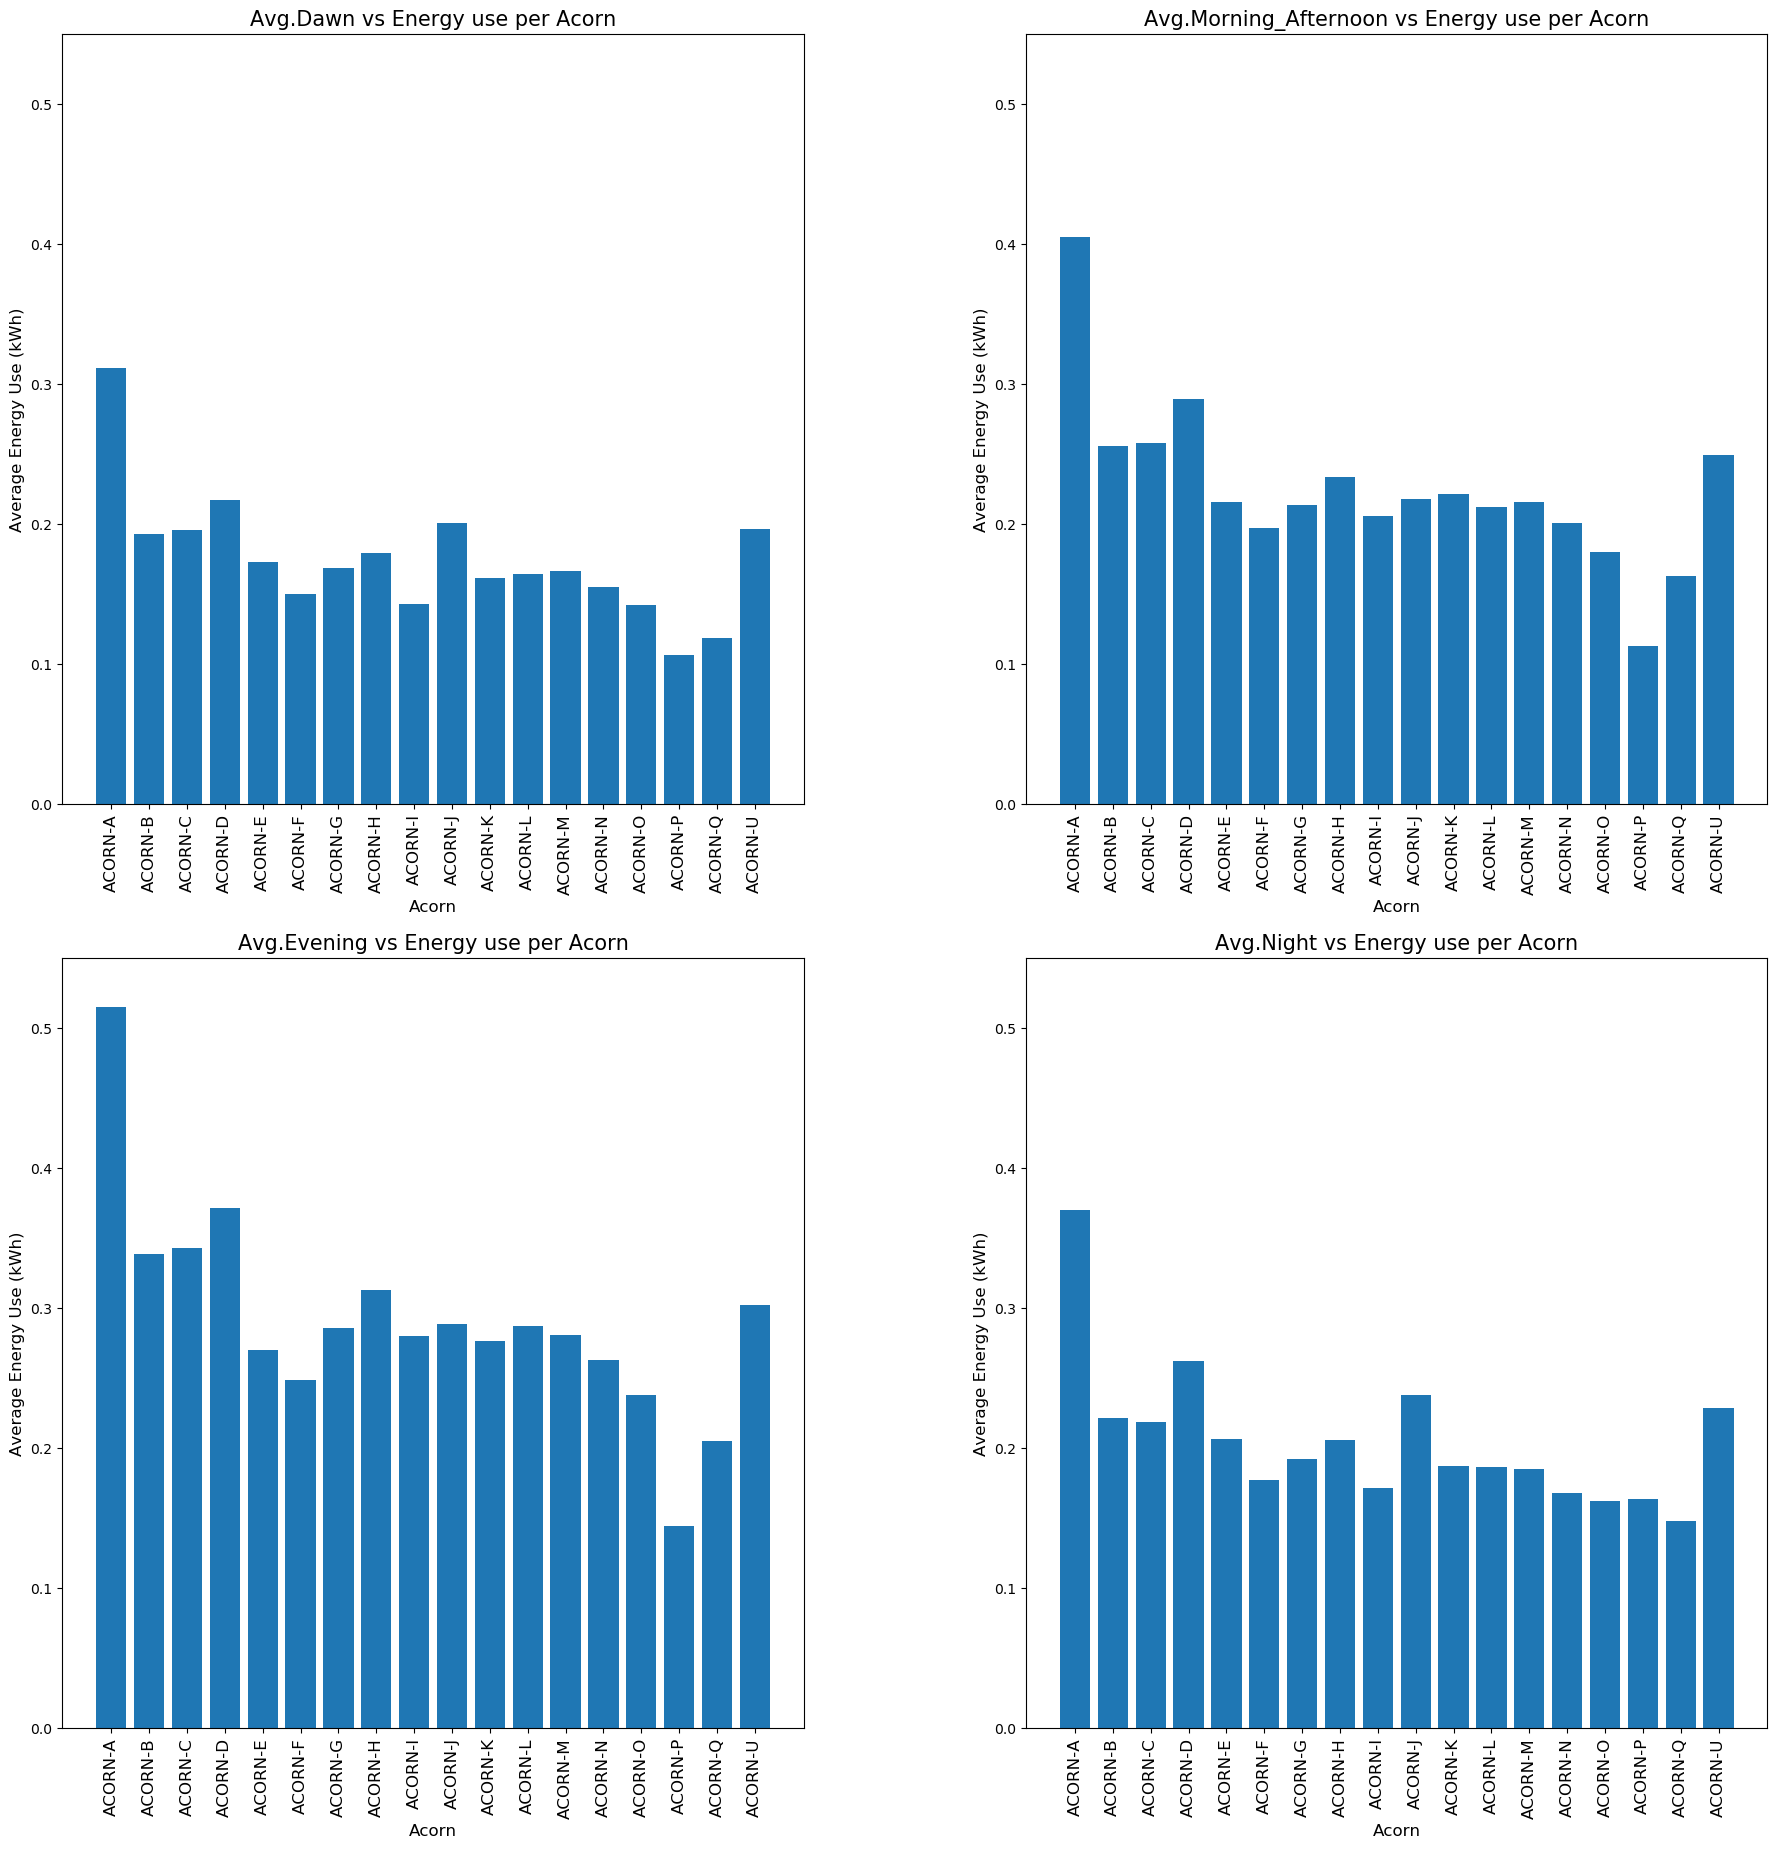

In [39]:
# Average Energy Use per Acorn by time of the day
plt.style.use('default')

labels_aco = pd.DataFrame(energy_df.groupby('Acorn'))[0]

fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    ax = fig.add_subplot(2, 2, i + 1)
    plt.bar(labels_aco, energy_df.groupby('Acorn').mean()[column])
    ax.set_title('{} vs Energy use per Acorn'.format(column), fontsize = 15)
    ax.set_ylabel('Average Energy Use (kWh)'.format(column), fontsize = 12)
    ax.set_xlabel('Acorn', fontsize = 12)
    ax.set_xticklabels(labels_aco, rotation = 90, fontsize = 12)
    ax.set_ylim(0, 0.55)
    
plt.show()

- **Feature importance & elimination**

     Preparing dataframe for feature importance modeling

In [101]:
#One-Hot Encode 'stdorToU', 'Acorn', 'Acorn_grouped', icon, precipType, uvIndex, Sunrise, Sunset, and Season

energy_df = pd.get_dummies(energy_df, columns=['sunset', 'sunrise'],
                           prefix=['ohe_sunset', 'ohe_sunrise'])

energy_df = pd.get_dummies(energy_df, columns=['stdorToU', 'Acorn', 'Acorn_grouped', 'icon', 'precipType',
                                              'uvIndex', 'Season'],
                           prefix=['ohe', 'ohe', 'ohe', 'oheicon', 'oheprecipType', 'oheuv', 'ohe'], 
                           drop_first = True)

In [102]:
# Checking dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(energy_df.head())

LCLid         day  Avg.Dawn  Avg.Morning_Afternoon  Avg.Evening  \
0  MAC000002  2012-10-13  0.133556               0.266667       0.2927   
1  MAC000246  2012-10-13  0.227889               0.342667       0.3197   
2  MAC000450  2012-10-13  1.216778               2.424250       2.7396   
3  MAC001074  2012-10-13  0.294333               0.552583       0.7322   
4  MAC003223  2012-10-13  0.126000               0.521250       0.6157   

   Avg.Night  holiday  energy_sum  temperatureMax  windBearing  cloudCover  \
0   0.218854        0   11.087000           12.32          300         0.2   
1   0.552292        0   19.283000           12.32          300         0.2   
2   1.344580        0   89.343999           12.32          300         0.2   
3   0.366943        0   22.727000           12.32          300         0.2   
4   0.335382        0   19.271000           12.32          300         0.2   

   windSpeed  pressure  visibility  humidity  moonPhase  ohe_sunset_16:00:00  \
0       2.36    1002.5       11.86       0.8       0.96                    0   
1       2.36    1002.5       11.86       0.8       0.96                    0   
2       2.36    1002.5       11.86       0.8       0.96                    0   
3       2.36    1002.5       11.86       0.8       0.96                    0   
4       2.36    1002.5       11.86       0.8       0.96                    0   

   ohe_sunset_17:00:00  ohe_sunset_18:00:00  ohe_sunset_19:00:00  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   ohe_sunset_20:00:00  ohe_sunrise_04:00:00  ohe_sunrise_05:00:00  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   ohe_sunrise_06:00:00  ohe_sunrise_07:00:00  ohe_sunrise_08:00:00  ohe_ToU  \
0                     1                     0                     0        0   
1                     1                     0                     0        0   
2                     1                     0                     0        0   
3                     1                     0                     0        1   
4                     1                     0                     0        0   

   ohe_ACORN-B  ohe_ACORN-C  ohe_ACORN-D  ohe_ACORN-E  ohe_ACORN-F  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   ohe_ACORN-G  ohe_ACORN-H  ohe_ACORN-I  ohe_ACORN-J  ohe_ACORN-K  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ohe_ACORN-L  ohe_ACORN-M  ohe_ACORN-N  ohe_ACORN-O  ohe_ACORN-P  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ohe_ACORN-Q  ohe_ACORN-U  ohe_Afflu

In [ ]:
# Feature importance with default RF Regressor
X = energy_df.drop(['energy_sum', 'LCLid', 'day'], axis=1)
y = energy_df['energy_sum']

rf = RandomForestRegressor(verbose=2)
rf.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100


In [ ]:
plt.style.use('seaborn-whitegrid');
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2))

In [40]:
# RF feature importance & Recursive Feature Elimination
# Videos Ken jee modeling + videos LSTM


In [41]:
#Intentar modelo con solo seasons y nada mas de weather
#Intentar modelo con y sin outliers
#inTENTAR MODELOS quitando avg.dawn, etc...
# Intentar dejando temperature min

